In [1]:
using LinearAlgebra, Plots

In [2]:
function infty_norm(x)
    max = 0;
    for i in eachindex(x)
        if( max < abs(x[i]) )
            max = abs(x[i]);
        end
    end

    return max;
end

infty_norm (generic function with 1 method)

In [3]:
function gradient_descent(a::Float64, s::Float64, ϵ::Float64,
    M::Int64  , x::Vector{Float64}, λ::Float64, k1::Int64, 
    k2::Int64, flag::Bool)
    k     = 0; # COUNTER
    f, ∇f = loss_function(x, λ, k1, k2);
    μ     = infty_norm(∇f);
    x_ant = 0;
    ∇f_ant= 0;

    while( (μ >= ϵ) && (k < M) )
        t_k = 1;
        if( flag == true && k != 0 )
            t_k = norm(x - x_ant, 2) / norm(∇f - ∇f_ant, 2);
        end

        armijo = a * dot(∇f, ∇f);
        while( loss_function(x - t_k * ∇f, λ, k1, k2)[1] > (f - t_k*armijo) )
            t_k = s * t_k;
        end

        x_ant  = x;
        ∇f_ant = ∇f;
       
        x      = x - t_k * ∇f;
        f, ∇f  = loss_function(x, λ, k1, k2);
        
        μ      = infty_norm(∇f);
        k      += 1;
    end

    println(k);
    return x;
end

gradient_descent (generic function with 1 method)

In [4]:
# Primeiro preciso ler os dados do problema:
global u₁, u₂, w;
u₁ = Float64[];
u₂ = Float64[];
w  = Float64[];

filepath = "curva_treino";
file     = open(filepath);
for line in eachline(file)
    row = parse.( Float64, split(line) );
    push!( u₁, row[1] );
    push!( u₂, row[2] );
    push!( w , row[3] );
end

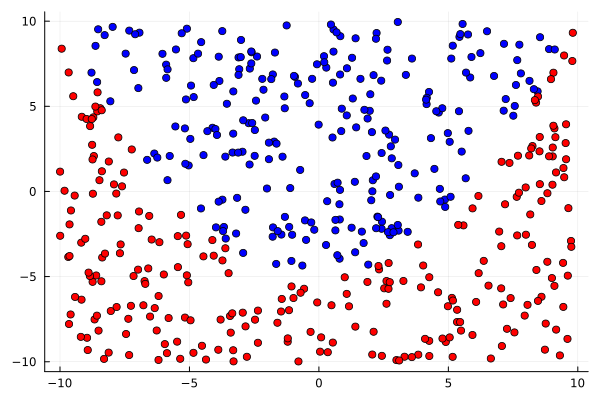

In [5]:
# Gero o scatter do problema apenas para ter uma noção da função.
colors = ifelse.( w .== 1, "blue", "red" );
plt = scatter!(u₁, u₂, color = colors, legend = false)

In [6]:
# Função de Ativação do problema!
function ϕ(x::Float64, k::Int64)
    if( k == 1 )
        f = x;
        g = 1;
    elseif( k == 2 )
        aux = 2 / π;
        f = aux * atan(x);
        g = a / ( 1 + x * x );
    elseif( k == 3 )
        f = tanh(x);
        g = 1 - f * f;
    elseif( k == 4 )
        aux = sqrt( 1 + x * x );
        f = 0.5 * ( x + aux );
        g = f / aux;
    end

    return f, g
end

ϕ (generic function with 1 method)

In [7]:
function f(x::Vector{Float64}, u::Vector{Float64}, k1::Int64, k2::Int64)
    # k1 : define a função de ativação da primeira camada.
    # k2 : define a função de ativação da segunda camada.
    func = 0;
    grad = zeros(length(x));

    b = x[1] * u[1] + x[2] * u[2] + x[5];
    c = x[3] * u[1] + x[4] * u[2] + x[6];
    ϕ_b, ϕ_b_prime = ϕ(b, k1);
    ϕ_c, ϕ_c_prime = ϕ(c, k1);


    a = x[7] * ϕ_b + x[8] * ϕ_c + x[9];
    ϕ_a, ϕ_a_prime = ϕ(a, k2);

    func = ϕ_a;
    
    grad[9] = 1;
    grad[8] = ϕ_c;
    grad[7] = ϕ_b;
    grad[6] = x[8] * ϕ_c_prime;
    grad[5] = x[7] * ϕ_b_prime;
    grad[4] = x[8] * ϕ_c_prime * u[2];
    grad[3] = x[8] * ϕ_c_prime * u[1];
    grad[2] = x[7] * ϕ_b_prime * u[2];
    grad[1] = x[7] * ϕ_b_prime * u[1];

    grad = ϕ_a_prime * grad;

    return func, grad;
end

f (generic function with 1 method)

In [8]:
function loss_function( x::Vector{Float64}, λ::Float64, k1::Int64, k2::Int64 )
    func = 0;
    grad = zeros(length(x));
    N = length(u₁);

    for i in 1:N
        u = [u₁[i]; u₂[i]];
        func_aux, grad_aux = f(x, u, k1, k2);
        aux = func_aux - w[i];

        func = func + func_aux ^ 2;
        grad = grad + aux * grad_aux;
    end

    
    func = (1 / (2*N))*func + λ/2 * dot(x, x);
    grad = (1/N)*grad + λ*x;
    
    return func, grad
end

loss_function (generic function with 1 method)

In [9]:
function loop_cost()
    M = 2000;
    x_best = zeros(9);
    best_cost = Inf;
    for i = 1:M
        x_testing = (2 * rand(9) .- 1) * 10;
        cost_value = loss_function(x_testing, 0.0, 1, 1)[1];
        if( cost_value < best_cost )
            x_best = x_testing;
            best_cost = cost_value
        end
    end
    
    return x_best;
end

loop_cost (generic function with 1 method)

In [10]:
x_inicial = loop_cost()

9-element Vector{Float64}:
  0.18166454746944893
 -0.26090173603950495
  2.3490012385193304
  1.0167639995751787
 -1.1610771324013225
 -8.544609751679053
 -1.8688096765002071
  0.10631899946597523
 -8.622566339744843

In [11]:
a = 10e-4;
s = 0.5  ;
ϵ = 1e-10 ;
M = 1000 ;
x_final = gradient_descent(a, s, ϵ, M, x_inicial, 0.0, 3, 2, false);

1000


In [12]:
x_final

9-element Vector{Float64}:
  0.16827713665128144
 -0.26026465667018245
  2.3492269035354685
  1.0173769848281768
 -1.1675430173957286
 -8.544476013647836
 -1.8845084174949223
  0.10048867761998255
 -8.604671313877805

In [13]:
loss_function(x_final, 0.0, 3, 2)

(0.4209585578356673, [1.2921807921365524e-5, -1.0301701581604046e-6, -2.2084999125256976e-7, -5.987238541533459e-7, 6.438566829175177e-6, -1.3076605009859042e-7, 1.584561271780502e-5, 5.859187646483776e-6, -1.8004363722983294e-5])

In [14]:
u = [u₁[1]; u₂[1]];
sign(f(x_final, u, 1, 1)[1])

-1.0

In [15]:
predict_classification = zeros(500);
N = length(u₁);
for i in 1:N
    k1 = 1;
    k2 = 1;
    u = [u₁[i]; u₂[i]];
    #println(f(x_final, u, k1, k2)[1])
    classification = sign(f(x_final, u, k1, k2)[1])
    predict_classification[i] = classification
end


0.49


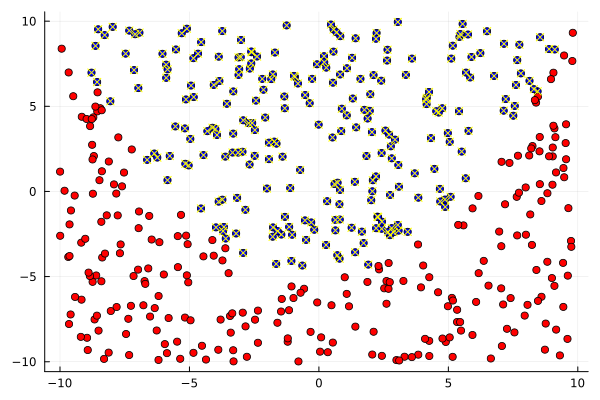

In [16]:
# Gero o scatter do problema apenas para ter uma noção da função.
colors = ifelse.( w .== 1, "blue", "red" );
plt = scatter(u₁, u₂, color = colors, legend = false)
N = length(u₁);

erros = 0
for i in 1:N
    if( predict_classification[i] != w[i] )
        plt = scatter!([u₁[i]], [u₂[i]], color="yellow", marker=:x, legend=false)
        erros += 1
    end
end
println(erros/500)
plt